# Discussion 01

Welcome to Discussion 01. In this discussion, we'll get more practice with linear algebra. In particular, we'll see how to do fundamental linear algebra operations in code with numpy.

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

## Part 1. Basic vector math in numpy

To begin, we need to know how to do basic vector math in numpy. To define a vector, we create a numpy array. For example, the vectors $\vec x = (4, -2, 1)^T$ and $\vec y = (1, 0, 5)^T$ are defined with:

In [11]:
x = np.array([4, -2, 1])
y = np.array([1, 0, 5])

**Problem 01**. What is $\vec x \cdot \vec y$? Compute your answer by hand.

In [13]:
...

Let's say we want to compute the dot product of $x$ and $y$ in numpy. The "old" way of doing this is to use the `.dot` method:

In [14]:
x.dot(y)

But the more modern way of computing the dot product is to use the `@` operator:

In [15]:
x @ y

To create a matrix, we make a two dimensional numpy array. For instance, to create the matrix

$$
A = \begin{pmatrix}
   3 & 8 & -2\\
   2 & -1 & 1\\
   4 & 0 & 0
\end{pmatrix}
$$

we write:

In [16]:
A = np.array([
    [3, 8, -2],
    [2, -1, 1],
    [4, 0, 0]
])

**Problem 02**. What is $A \vec x$, where $\vec x$ was defined above as $\vec x = (4, -2, 1)^T$? Compute your answer by hand and write it as a numpy array.

In [29]:
...

To compute the product $A\vec  x$ in numpy, we can again use the `@` operator:

In [23]:
A @ x

We can also multiply matrices with `@`:

In [24]:
A @ A

Note that numpy defaults to performing many operators in an "elementwise" fashion. For example, in math, the notation $A^2$ denotes the matrix $A A$, that is, the product of $A$ with itself. In Python, we can raise something to a power using the `**` operator. But if we write `A**2`, we do not get $A^2$:

In [25]:
A**2

Numpy has instead squared each element of $A$. This is something to watch out for!

**Problem 03**. Try computing `A * x`. In words, what does it compute?

In [37]:
...

We can transpose a matrix with `.T`:

In [38]:
A

In [39]:
A.T

Note that if we try to transpose a vector, nothing happens:

In [40]:
x

In [41]:
x.T

In math, we often work with "column vectors", and transposing a column vector turns it into a "row" vector. Numpy 1-d arrays do not distinguish between column vectors and row vectors. This is usually just fine, and is quite convenient.

If you *really* want to distinguish between row and column vectors, you need to turn your 1-d array into a 2-d array. One way to do this is with `np.reshape`. The second argument is the new shape of the array:

In [49]:
np.reshape(x, (3, 1))

A shorthand is to slice the array with `None` as the second argument:

In [50]:
x[:, None]

Lastly, numpy comes with a variety of linear algebra functions in the `np.linalg` module. It is worth exploring the [documentation](https://numpy.org/doc/stable/reference/routines.linalg.html).

One function that may come in handy is `np.linalg.norm`, which computes the norm of a vector (by default, the Euclidean norm, i.e., the length).

In [51]:
np.linalg.norm(x)

We can use this to normalize a vector into a unit vector:

In [53]:
u = x / np.linalg.norm(x)
u

## Part 2. Changing basis

In lecture, we saw that we can use the dot product to change basis (as long as the new basis is an orthonormal basis). In particular, if $\mathcal U = \{ \hat u^{(1)}, \hat u^{(2)}, \ldots, \hat u^{(d)} \}$, and $\vec x$ is a vector, then $[\vec x]_\mathcal{U} = ( \vec x \cdot \hat u^{(1)},  \vec x \cdot \hat u^{(2)}, \ldots, \vec x \cdot \hat u^{(d)} )^T$.

**Problem 01.** Let
$$\vec u^{(1)} = (1, 1, 0)^T$$
$$\vec u^{(2)} = (-1, 1, 0)^T$$
$$\vec u^{(3)} = (0, 0, 1)^T$$

These vectors are mutually orthogonal, but they are not all unit vectors, and so they do not form an orthonormal basis.

Define numpy arrays `u_1`, `u_2`, and `u_3` by normalizing the above vectors, thereby making them an orthonormal basis for $$\mathbb R^3.$$

In [55]:
...

**Problem 02.** Let $\vec x = (2, 5, -4)^T$. What are the coordinates of $\vec x$ with respect to the basis $\mathcal U$?

In [62]:
...

**Problem 03.** Define a matrix $A$ such that $A$ performs the change of basis above. That is: $[\vec x]_\mathcal{U} = A \vec x$

In [66]:
...

**Problem 04**. Show that $A^T [\vec x]_\mathcal{U} = \vec x$ by computing $A^T [\vec x]_\mathcal{U}$.

In [74]:
...

**Problem 05.** Using a function from `np.linalg`, compute $A^{-1}$. Compare this to $A.T$.

In [75]:
...

## Part 3. Linear Transformations

Consider the linear transformation $\vec f(\vec x) : \mathbb R^2 \to \mathbb R^2$ which takes a vector and mirrors it over the line that makes a 45 degree angle with the $x$-axis. For example:

<div>
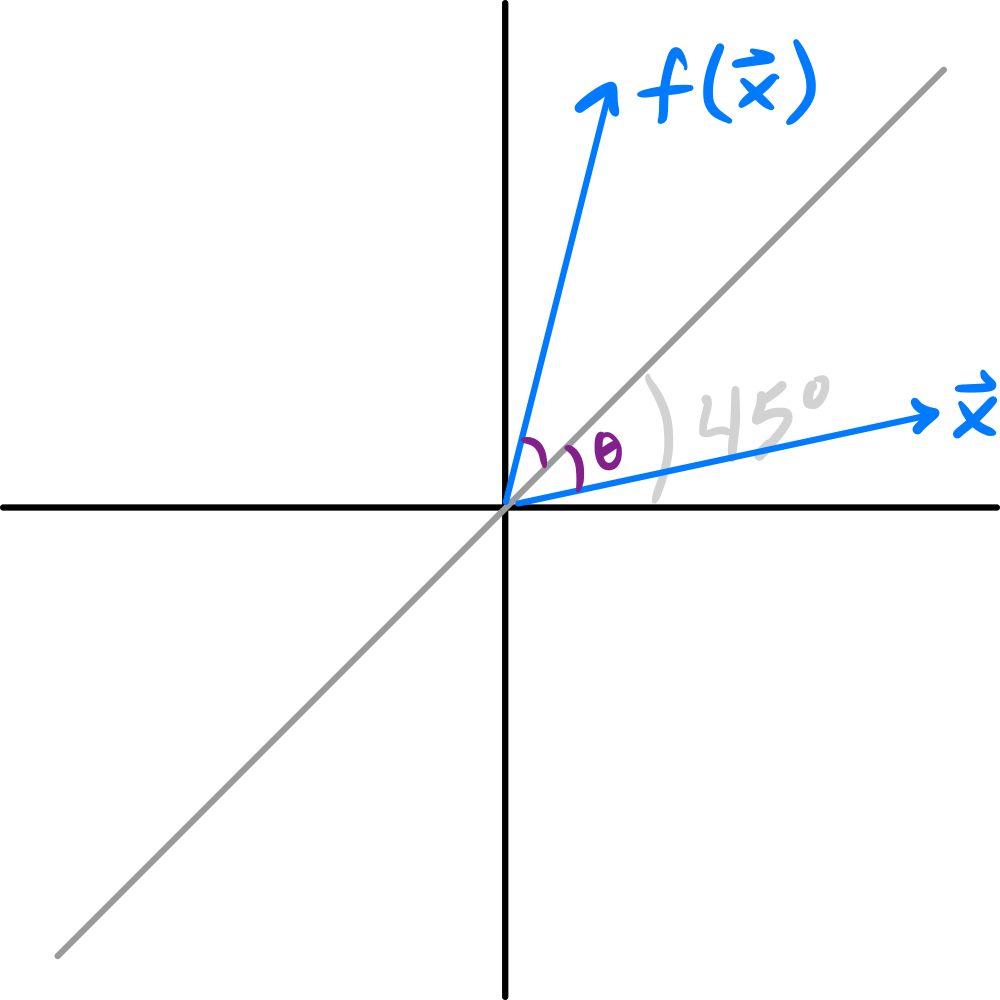
</div>

**Question 01**. Write the matrix describing this linear transformation with respect to the standard basis.

In [84]:
...

**Question 02**. Show (by computing it) that $A^2 = I$, where $I$ is the identity matrix. Explain in words why this is.

In [99]:
...

**Question 03**. Show (by computing it) that $A = A^{-1}$

In [103]:
...

## Part 4. Eigenvectors

**Question 01**. Without computing them, what the eigenvectors and eigenvalues of the matrix $A$ you computed above?

In [109]:
...

**Question 02**. `np.linalg.eigh` can be used to compute the eigenvectors of a *symmetric* matrix. Read its [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh), and use it to compute the eigenvectors.

The eigenvectors are returned as a matrix. Are the rows the eigenvectors, or the columns?

In [111]:
...